In [16]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

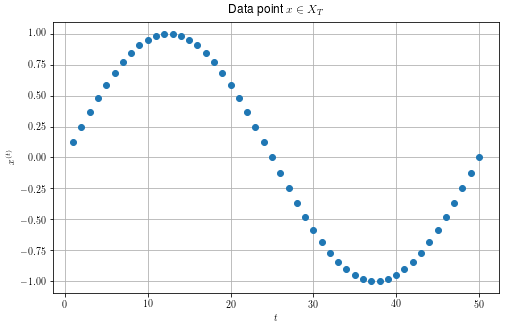

In [45]:
%matplotlib inline
n_t = 50
time_samples = np.array(range(1,n_t+1))
x = np.sin(2*np.pi*time_samples/n_t)
plt.figure(figsize=(8,5))
plt.plot(time_samples, x, 'o')
plt.grid()
plt.title(r'Data point $x\in X_T$')
plt.xlabel(r'$t$')
plt.ylabel(r'$x^{(t)}$')
# plt.xlim([0,50])
plt.savefig('Sine_signal.png')
plt.show()


In [24]:
from PIL import Image
from scipy import ndimage, misc
import imageio
import matplotlib.pyplot as plt

In [212]:
image = imageio.imread('symbol3.png')

In [213]:
image.shape

(128, 128)

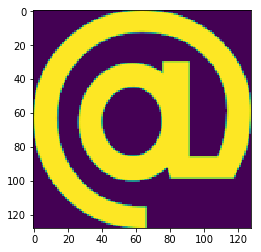

In [156]:
%matplotlib inline
plt.imshow(face)
plt.show()

In [157]:
import numpy as np
def circular_shift(image, w_pix_shift, h_pix_shift ):
    shifted_image = np.roll(image, w_pix_shift, axis = 1)
    shifted_image = np.roll(shifted_image, h_pix_shift, axis = 0)
    return shifted_image

In [158]:
shifted = circular_shift(face, 20, 50)

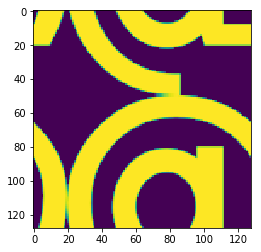

In [159]:
plt.imshow(shifted)
plt.show()

In [225]:
def create_circular_shift_generator(image:np.ndarray, axis:np.ndarray, batch_size:int, shuffle:bool):
    max_pix_shift = image.shape[axis]
    assert max_pix_shift%batch_size==0, 'The image size along the axis is not a multiple of the batch_size.'
    def circular_shift_generator():
        # Create the order of pixel shifting
        pixel_shifts = np.arange(max_pix_shift)
        if shuffle:
            np.random.shuffle(pixel_shifts)
        # Number of batches per epoch
        batches = max_pix_shift//batch_size
        for num_batch in range(batches):
            data_batch = np.zeros([batch_size, *image.shape], dtype=image.dtype)
            for num_element in range(batch_size):
                data_batch[num_element] = np.roll(image,
                                                  pixel_shifts[(num_batch*batch_size)+num_element],
                                                  axis=axis)
            yield data_batch
    return circular_shift_generator
    
    

In [226]:
image.dtype

dtype('uint8')

In [228]:
a = np.zeros([10, *image.shape],dtype=image.dtype)

In [229]:
a[0].shape

(128, 128)

In [230]:
10%5

0

In [243]:
generator = create_circular_shift_generator(image, 0, 64, False)

In [249]:
image.dtype

dtype('uint8')

In [247]:
import tensorflow as tf
ds = tf.data.Dataset.from_generator(generator)
value = ds.make_initializable_iterator()
next_element = value.get_next()
with tf.Session() as sess:
    sess.run(value.initializer)
    for i in range(2):
        batch = sess.run(next_element)
        print(batch.shape)
        plt.imshow(batch[0,:,:])
        plt.show()

TypeError: from_generator() missing 1 required positional argument: 'output_types'

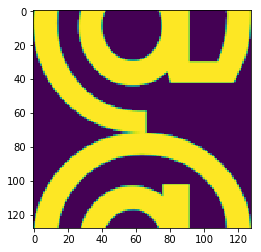

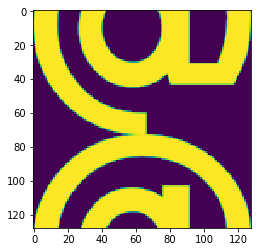

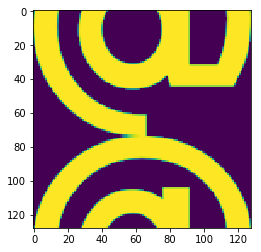

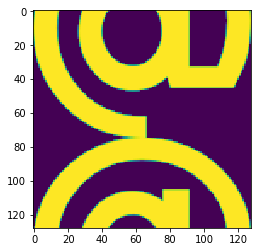

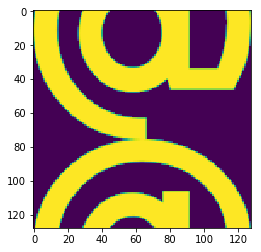

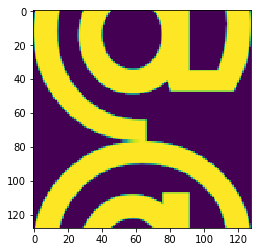

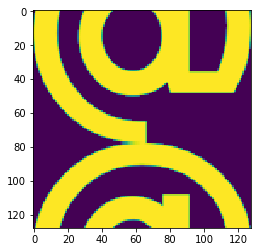

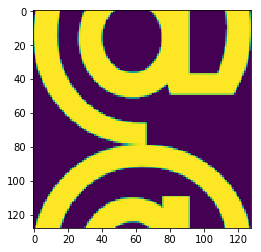

In [242]:
for i in range(len(batch)):
    plt.imshow(batch[i])
    plt.show()

In [149]:
np.roll(np.array([0,1,2,3]), 0)

array([0, 1, 2, 3])